In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib as mp
import cv2
import imghdr
import os
import numpy as np
from matplotlib import pyplot as plt


In [2]:
current_dir = os.getcwd()
data_root = f"{current_dir}\data\happy-v-sad"
data_root

'd:\\Bach Thao\\DAT301m\\CODE\\Lab1\\data\\happy-v-sad'

##### Use ImageDataGenerator

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  train_datagen = ImageDataGenerator(rescale=1/255,
                                     rotation_range=20,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     horizontal_flip=True
                                     )

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=5,
                                                      subset='training',
                                                      class_mode='binary',
                                                      shuffle=True,
                                                      target_size=(256, 256))

  validation_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                      batch_size=5,
                                                      subset='validation',
                                                      class_mode='binary',
                                                      shuffle=True,
                                                      target_size=(256, 256))
  ### END CODE HERE
  return train_generator, validation_generator

In [4]:
data_root = f"{current_dir}\\data\\"


train_generator, validation_generator = train_val_generators(data_root, data_root)

Found 167 images belonging to 2 classes.
Found 33 images belonging to 2 classes.


##### Defining your callback

In [5]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.9:
            print("\nReached than 81% accuracy so cancelling training!")
                
                # Stop training once the above condition is met
            self.model.stop_training = True

callback = myCallback()

##### Building CNN Model

In [6]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D,MaxPooling2D , Dense , Flatten , Dropout, BatchNormalization
from keras.applications.resnet import ResNet50

In [12]:
model = Sequential()

model.add(Conv2D(16, (3,3),1, activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3),1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3),1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam', loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [13]:
# Train the model

callback = myCallback()
history = model.fit(train_generator,
                    epochs=30,
                    verbose=1,
                    validation_data=validation_generator, callbacks=[callback])

Epoch 1/30
34/34 [==============================] - 8s 200ms/step - loss: 0.7753 - accuracy: 0.5749 - val_loss: 0.5762 - val_accuracy: 0.7576
Epoch 2/30
34/34 [==============================] - 7s 195ms/step - loss: 0.5945 - accuracy: 0.7246 - val_loss: 0.6241 - val_accuracy: 0.5758
Epoch 3/30
34/34 [==============================] - 6s 193ms/step - loss: 0.5417 - accuracy: 0.7126 - val_loss: 0.5984 - val_accuracy: 0.6970
Epoch 4/30
34/34 [==============================] - 6s 192ms/step - loss: 0.5033 - accuracy: 0.7665 - val_loss: 0.4577 - val_accuracy: 0.8182
Epoch 5/30
34/34 [==============================] - 6s 188ms/step - loss: 0.4568 - accuracy: 0.7725 - val_loss: 0.4644 - val_accuracy: 0.7879
Epoch 6/30
34/34 [==============================] - 6s 187ms/step - loss: 0.4647 - accuracy: 0.7844 - val_loss: 0.5838 - val_accuracy: 0.6364
Epoch 7/30
34/34 [==============================] - 6s 191ms/step - loss: 0.4675 - accuracy: 0.7904 - val_loss: 0.4183 - val_accuracy: 0.8182
Epoch 

##### Plotting Loss

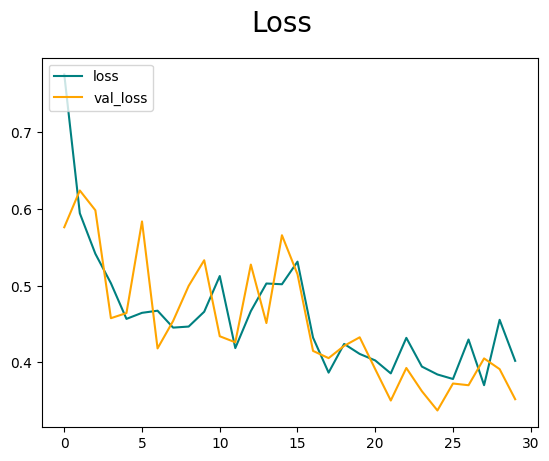

In [14]:
fig = plt.figure()
plt.plot(history.history['loss'], color = 'teal', label='loss')
plt.plot(history.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

##### Plotting Accuracy

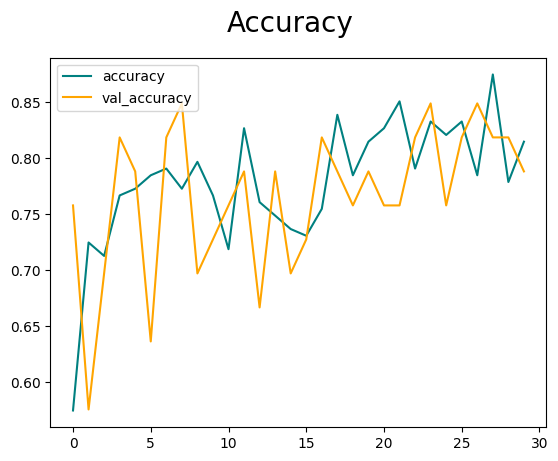

In [15]:
fig = plt.figure()
plt.plot(history.history['accuracy'] , color ='teal' , label ='accuracy')
plt.plot(history.history['val_accuracy'], color ='orange' , label = 'val_accuracy')
fig.suptitle('Accuracy' , fontsize =20)
plt.legend(loc="upper left")
plt.show()

##### Predict test

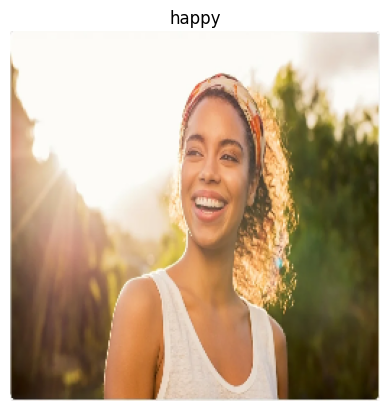

In [16]:
import cv2

img_width, img_height = 256, 256

img = cv2.imread('test.png')
img = cv2.resize(img, (img_width, img_height))
img = img / 255.0

img = np.expand_dims(img, axis=0)

prediction = model.predict(img)
predicted_label = (prediction > 0.5).astype(int)

result = 'happy' if predicted_label[0] == 1 else 'sad'
for i, label in enumerate(predicted_label):
    img = (img * 255).astype(np.uint8)
    plt.imshow(cv2.cvtColor(img[0], cv2.COLOR_BGR2RGB))
    plt.title(result)
    plt.axis('off')
    plt.show()